In [5]:
# import 
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# ML for prediction
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
# Download Tata Steel Stock data
df = yf.download("TATASTEEL.NS", start="2021-01-01", end="2025-06-15")
df.reset_index(inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9588\2410197117.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TATASTEEL.NS", start="2021-01-01", end="2025-06-15")
[*********************100%***********************]  1 of 1 completed


In [8]:
# save to CVS
df.to_csv("tata_steel_stock.cvs", index=False)
print("Downloaded and saved tata_steel_stock.csv")

Downloaded and saved tata_steel_stock.csv


In [9]:
print(df.head())

Price        Date        Close         High          Low         Open  \
Ticker            TATASTEEL.NS TATASTEEL.NS TATASTEEL.NS TATASTEEL.NS   
0      2021-01-01    25.937628    26.203822    25.812599    26.014260   
1      2021-01-04    27.950205    28.228495    26.072739    26.175588   
2      2021-01-05    27.448065    27.984484    27.228255    27.708206   
3      2021-01-06    27.579144    28.097414    27.224221    27.587212   
4      2021-01-07    29.152100    29.502991    27.897769    27.950202   

Price        Volume  
Ticker TATASTEEL.NS  
0          84113960  
1         381849550  
2         215452540  
3         196105220  
4         382321940  


In [10]:
# Daily return
df['Daily Return %'] = df['Close'].pct_change() * 100

In [11]:
# moving Averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

In [12]:
df.isnull().sum()

Price           Ticker      
Date                             0
Close           TATASTEEL.NS     0
High            TATASTEEL.NS     0
Low             TATASTEEL.NS     0
Open            TATASTEEL.NS     0
Volume          TATASTEEL.NS     0
Daily Return %                   1
MA20                            19
MA50                            49
dtype: int64

In [13]:
# drop NA
df.dropna(inplace= True)

In [14]:
df.isnull().sum()

Price           Ticker      
Date                            0
Close           TATASTEEL.NS    0
High            TATASTEEL.NS    0
Low             TATASTEEL.NS    0
Open            TATASTEEL.NS    0
Volume          TATASTEEL.NS    0
Daily Return %                  0
MA20                            0
MA50                            0
dtype: int64

In [15]:
# save
df.to_csv("tata_steel_processed.csv", index= False)

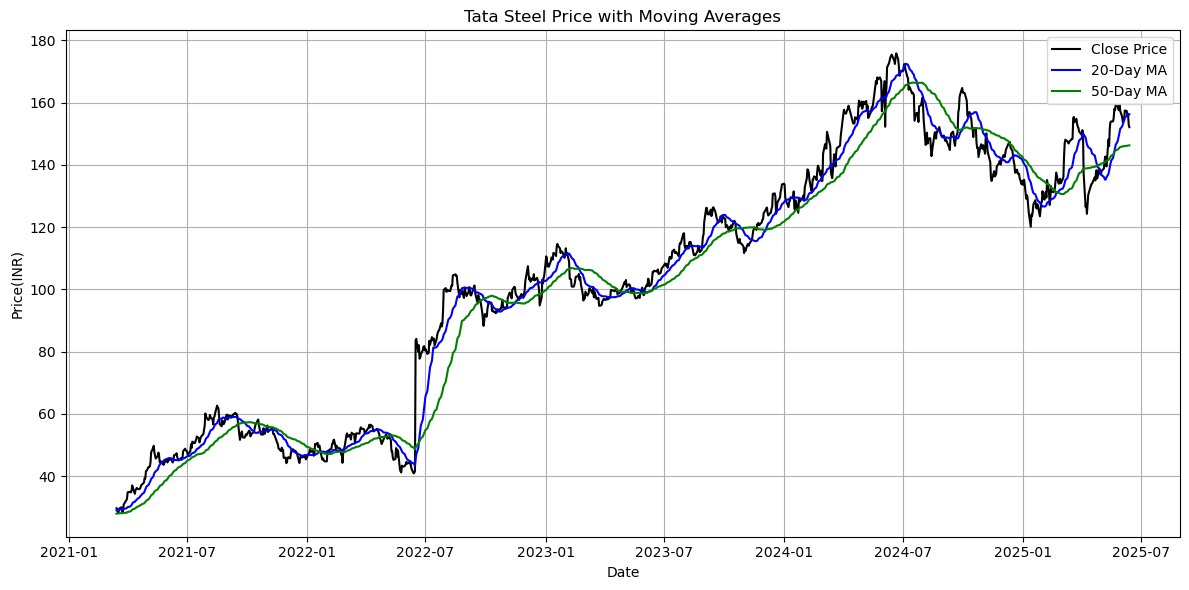

In [16]:
# Plot stock trands
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label= 'Close Price', color= 'black')
plt.plot(df['Date'], df['MA20'], label= '20-Day MA', color= 'blue')
plt.plot(df['Date'], df['MA50'], label= '50-Day MA', color= 'green')
plt.title("Tata Steel Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price(INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# predicting next day's return using today's return
df['Target'] = df['Daily Return %'].shift(-1)
df.dropna(inplace= True)

x = df[['Daily Return %']]
y = df['Target']

In [18]:
# Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [20]:
# Prediction
y_pred = model.predict(x_test)

In [21]:
# Match Date to y_test using index
df_date = df.loc[y_test.index, 'Date'].reset_index(drop=True)

In [22]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 4.5080


In [25]:
# Create final DataFrame
pred_df = pd.DataFrame({
    'Date': df_date,
    'Actual': y_test.reset_index(drop=True),
    'Predicted': y_pred
})


In [26]:
# Save to CSV
pred_df.to_csv("return_predictions.csv", index=False)
print("✅ Saved return_predictions.csv with Date column!")

✅ Saved return_predictions.csv with Date column!
